# Machine Learning Final Exam, Aug Semester, 2019

In this exam, you will demonstrate your understanding of the material from the lectures, tutorials, and problem sets.

For each question, insert your answer directly in this sheet. When complete, export the sheet as a PDF and upload to Gradescope.
Note that you have **2.5 hours** to do the exam. Also note that there are some short answer questions that you may be able to answer faster than the coding questions. You might consider answering those questions first to get as much credit as possible!

## Question 1 (10 points)

Generate 200 2D points from each of 2 Guassians with distributions shaped roughly as shown in the diagram below, with class 1 as the 'X's and class 2 as the 'O's. Plot the resulting 400 points with different colors for each Gaussian.


## Question 2 (20 points)

Do the following:
1. Split the dataset from Question 1 into a training set (80%) and validation set (20%).
2. Fit a logistic regression model to the data in the training set.
3. Indicate the training set accuracy and validation set accuracy of the logistic regression model.
4. Make two separate plots, one for the training set and one for the validation set, with three colors: one for correctly classified points from class 1, one for correctly classified points from class 2, and one for incorrectly classified points.

## Question 3 (20 points)

Do the following:
1. Use the SVM code developed in class to fit linear SVMs to the training data from Question 2. Use several different values of hyperparameter c (the tolerance to points crossing the hyperplane), and plot validation set accuracy as a function of c.
2. Explain which model is best and why.

## Question 4 (20 points)

Do the following:
1. Use the SVM code developed in class to fit SVMs with the RBF kernel to the training data from Question 2. Use several different values of hyperparameter c (the tolerance to points crossing the hyperplane) and gamma (the basis function width), and plot validation set accuracy as a function of c and gamma.
2. Explain which model is best and why.

## Question 5 (20 points)

Using the neural network code you developed (based on the code from class) for the deep learning homework assignment, do the following:
1. Fit a two-layer neural network with ReLU activations in the hidden layer and a logistic output layer to the training data from Question 2. Use several different numbers of hidden units in the hidden layer, and plot validation set accuracy as a function of the number of units in the hidden layer.
2. Explain which neural network is best and why, and briefly compare the neural network to the logistic regression and SVM models developed in the previous questions.

## Question 6 (10 points)

Consider what would happen if you got the data from Question 1 *without labels* and were tasked with using unsupervised learning to model and understand the data set. Based on a quick visualization, you see that there seem to be two main clusters in the data and decide to build a $k$-means ($k$=2) or GMM for the dataset.

Obviously, a GMM would be appropriate, as the data were generated from a mixture of Gaussians in the first place. On the other hand, the $k$-means model would be simpler. Would it be as effective?

Do the following:
1. Write the parameters $\phi_1$, $\phi_2$, $\mathbf{\mu}_1$, $\mathbf{\mu}_2$, $\mathtt{\Sigma}_1$, $\mathtt{\Sigma}_2$ of the "ground truth" model used to generate the data in Question 1.
2. Briefly discuss whether, in practice, the $k$-means model would be worse than, equally good, or better than a GMM for this dataset.



## Question 1

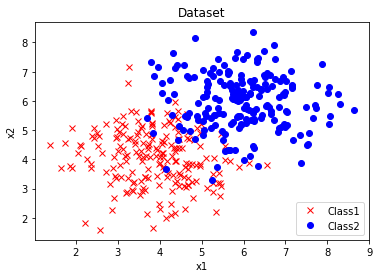

In [26]:
import numpy as np
import matplotlib.pyplot as plt

class1_mean = [4, 4]
class2_mean = [6, 6]
class1_cov = np.eye(2)
class2_cov = np.eye(2)

num_of_clusters = 2
m1 = 200
m2 = 200
i = 0
c1 = np.random.multivariate_normal(class1_mean, class1_cov, m1)
c2 = np.random.multivariate_normal(class2_mean, class2_cov, m2)

plt.title("Dataset")
plt.xlabel("x1")
plt.ylabel("x2")
plt.plot(c1.T[0],c1.T[1],'rx', label="Class1")
plt.plot(c2.T[0],c2.T[1],'bo', label="Class2")
plt.legend(loc="lower right")

X = np.append(c1,c2, axis = 0)
y = np.concatenate([np.matrix(np.zeros([m1,1])),np.matrix(np.ones([m2,1]))]);
M = X.shape[0]

## Question 2

In [27]:
eighty_perc = int(0.8*M)
indices = np.random.permutation(M)
train_indices = indices[:eighty_perc]
validation_indices = indices[eighty_perc:]

training_X = X[train_indices,:]
validation_X = X[validation_indices,:]
training_y = y[train_indices,:]
validation_y = y[validation_indices,:]

training_count = len(training_X)
test_count = len(validation_X)

In [28]:
def sigmoid(theta, X):
    return 1 / (1 + np.exp(-np.dot(X, theta)))

def log_likelihood(theta, X, y):
    h = sigmoid(theta, X)
    return np.sum(np.multiply(y, np.log(h)) + np.multiply((1-y), np.log(1-h)))

def gradient(theta, X, y):
    predictions = sigmoid(theta, X)
    errors = y - predictions
    gradient = (np.dot(X.T, errors))
    return gradient

In [29]:
X_train = np.concatenate([np.ones([training_count,1]), training_X], axis=1)
X_validation = np.concatenate([np.ones([test_count,1]), validation_X], axis=1)

alpha = 0.001
theta = np.array([[0.1], [0.1], [0.1]])
cost_initial = log_likelihood(theta, X_train, training_y)
grad = gradient(theta, X_train, training_y)
print("Initial Cost: %f" % cost_initial)
print("Initial Gradient: %s" % grad )

Initial Cost: -237.936649
Initial Gradient: [[ -79.23391455]
 [-246.01381229]
 [-262.60872595]]


In [30]:
costs = []
gradients = np.array([[], [], []])
thetas = np.array([[], [], []])
iterations = 5000
from sklearn.metrics import accuracy_score
for i in range(iterations):
    cost = log_likelihood(theta, X_train, training_y)
    grad = gradient(theta, X_train, training_y)
    theta = theta + alpha * grad
    
    costs.append(cost)
    thetas = np.append(thetas, theta, axis=1)
    gradients = np.append(gradients, grad, axis=1)

In [31]:
print("Final theta: %s" % theta)

Final theta: [[-18.89350756]
 [  2.04161546]
 [  1.77267909]]


In [32]:
y_pred_train = sigmoid(theta, X_train)

y_pred_classified = y_pred_train
y_pred_classified[y_pred_classified >= 0.5] = 1
y_pred_classified[y_pred_classified < 0.5] = 0

num_differences_train = np.sum(np.power(training_y - y_pred_train, 2))
train_accuracy = 1-(num_differences_train/training_count )

y_pred_test = sigmoid(theta, X_validation)
y_pred_classified = y_pred_test
y_pred_classified[y_pred_classified >= 0.5] = 1
y_pred_classified[y_pred_classified < 0.5] = 0
num_differences_test = np.sum(np.power(validation_y - y_pred_test, 2))
test_accuracy = 1-(num_differences_test/test_count)

print("Train accuracy: ", train_accuracy)
print("Test accuracy: ", test_accuracy)

Train accuracy:  0.94375
Test accuracy:  0.9375


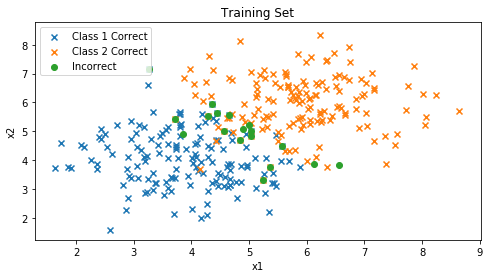

In [33]:
c1_vals = np.where(training_y == 0)[0]
c1_train_correct = np.where(training_y[c1_vals] == y_pred_train[c1_vals])[0]

c2_vals = np.where(training_y == 1)[0]
c2_train_correct = np.where(training_y[c2_vals] == y_pred_train[c2_vals])[0]

incorrect = np.where(training_y != y_pred_train)[0]

fig5 = plt.figure(figsize=(8,4))
plt.title("Training Set")
plt.xlabel("x1")
plt.ylabel("x2")
plt.scatter(c1[c1_train_correct,0], c1[c1_train_correct,1], marker='x', label="Class 1 Correct")
plt.scatter(c2[c2_train_correct,0], c2[c2_train_correct,1], marker='x', label="Class 2 Correct")
plt.scatter(training_X[incorrect,0], training_X[incorrect,1], marker='o', label="Incorrect")
plt.legend(loc="upper left")
plt.show() 

/home/adam/.pyenv/versions/3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  import sys


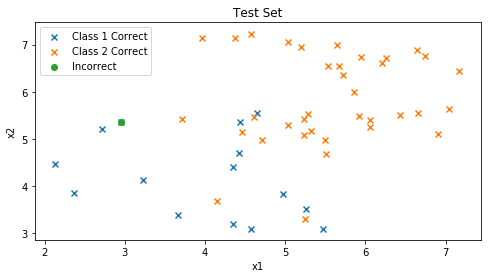

In [34]:
c1_vals_test = np.where(validation_y == 0)[0]
c1_test_correct = np.where(validation_y[c1_vals_test] == y_pred_train[c1_vals_test])[0]

c2_vals_test = np.where(validation_y == 1)[0]
c2_test_correct = np.where(validation_y[c2_vals_test] == y_pred_test[c2_vals_test])[0]

incorrect_test = np.where(validation_y != y_pred_train)[0]
#c1_train_correct = np.where(training_y == y_pred_train)[0]

fig5 = plt.figure(figsize=(8,4))
plt.title("Test Set")
plt.xlabel("x1")
plt.ylabel("x2")
plt.scatter(c1[c1_test_correct,0], c1[c1_test_correct,1], marker='x', label="Class 1 Correct")
plt.scatter(c2[c2_test_correct,0], c2[c2_test_correct,1], marker='x', label="Class 2 Correct")
plt.scatter(validation_X[incorrect_test,0], validation_X[incorrect_test,1], marker='o', label="Incorrect")
plt.legend(loc="upper left")
plt.show() 

## Question 3

In [ ]:
def cvxopt_solve_qp(Q, c, A=None, b=None, E=None, d=None):
    Q = .5 * (Q + Q.T)  # make sure Q is symmetric
    args = [cvxopt.matrix(Q), cvxopt.matrix(c)]
    if A is not None:
        args.extend([cvxopt.matrix(A), cvxopt.matrix(b)])
        if E is not None:
            args.extend([cvxopt.matrix(E), cvxopt.matrix(d)])
    sol = cvxopt.solvers.qp(*args)
    if 'optimal' not in sol['status']:
        return None
    return np.array(sol['x']).reshape((Q.shape[1],))

def get_wb(X, y, alpha):
    # Find the support vectors
    S = alpha > 1e-6
    XS = X[S,:]
    yS = y[S]
    alphaS = alpha[S]
    alphaSyS = np.tile(np.multiply(yS.T, alphaS).T, n)
    w = sum(np.multiply(alphaSyS, XS)).T
    # Find b
    KS = K[S,:][:,S]
    NS = yS.shape[0]
    b = (np.sum(yS) - np.sum(np.multiply(alphaS,yS.T)*KS))/NS
    # Normalize w,b
    scalef = np.linalg.norm(w)
    w = w / scalef
    b = b / scalef
    return w,b

def linear_kernel(X):
    m = X.shape[0];
    K = np.matrix(np.zeros([m,m]));
    for i in range(0,m):
        for j in range(0,m):
            K[i,j] = X[i,:]*(X[j,:].T)
    return K;

def plot_w(w,b):
    ylim = plt.axes().get_ylim()
    xlim = plt.axes().get_xlim()
    p1 = (xlim[0], - (w[0,0] * xlim[0] + b) / w[1,0])
    p2 = (xlim[1], - (w[0,0] * xlim[1] + b) / w[1,0])
    plt.plot((p1[0],p2[0]), (p1[1],p2[1]), 'r-')

## Question 4

In [ ]:
# RBF/Gaussian kernel

def gauss_kernel(X):
    sigma = 0.2
    m = X.shape[0];
    K = np.matrix(np.zeros([m,m]));
    for i in range(0,m):
        for j in range(0,m):
            K[i,j] = (X[i,:] - X[j,:]) * (X[i,:] - X[j,:]).T
    K = np.exp(-K/(2*sigma*sigma))      
    return K;

## Question 5

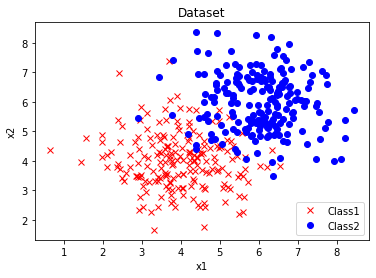

In [38]:
import numpy as np
import cvxopt
import matplotlib.pyplot as plt

class1_mean = [4, 4]
class2_mean = [6, 6]
class1_cov = np.eye(2)
class2_cov = np.eye(2)

num_of_clusters = 2
m1 = 200
m2 = 200
i = 0
c1 = np.random.multivariate_normal(class1_mean, class1_cov, m1)
c2 = np.random.multivariate_normal(class2_mean, class2_cov, m2)

plt.title("Dataset")
plt.xlabel("x1")
plt.ylabel("x2")
plt.plot(c1.T[0],c1.T[1],'rx', label="Class1")
plt.plot(c2.T[0],c2.T[1],'bo', label="Class2")
plt.legend(loc="lower right")

X = np.append(c1,c2, axis = 0)
y = np.concatenate([np.matrix(np.zeros([m1,1])),np.matrix(np.ones([m2,1]))]);
M = X.shape[0]
N = X.shape[1]

# Splitting dataset
eighty_perc = int(0.8*M)
indices = np.random.permutation(M)
train_indices = indices[:eighty_perc]
validation_indices = indices[eighty_perc:]

training_X = X[train_indices,:]
validation_X = X[validation_indices,:]
training_y = y[train_indices,:]
validation_y = y[validation_indices,:]

training_count = len(training_X)
test_count = len(validation_X)

In [39]:
units = [1,2,3,4,6,8]

def sigmoid(z):
    return 1/(1+np.exp(-z))

def relu(z):
    return np.maximum(0,z)

def relu_der(z):
    return np.where(z>0, 1, 0)

def sigmoid_loss(y,yhat):
    return -((1-y) * np.log(1-yhat) + y * np.log(yhat))

test_scores = []

alpha = 0.001
max_iter = 50

In [40]:
for unit in units:
    h1 = unit
    
    # initializing weights
    W = [[], np.random.normal(0,0.1,[N,h1]),
             np.random.normal(0,0.1,[h1,1])]
    
    # 6 biases for layer 1, 5 biases for layer 2
    b = [[], np.random.normal(0,0.1,[h1,1]),
             np.random.normal(0,0.1,[1,1])]
    
    # output layer index, not # of layers
    L = len(W)-1
    
    train_loss_log = np.array([])
    validation_loss_log = np.array([])
    
    
    test_accuracy = 0
    for iter in range(0, max_iter):
        correct = 0
        loss_array = np.array([])
        validation_loss_array = np.array([])
        loss_this_iter = 0
        validation_loss_this_iter = 0
        order = np.random.permutation(training_count)
        
        # Training for this iteration
        for i in range(0,training_count):
            
            # Grab the pattern order[i], choose a training example (SGD)
            
            x_this = training_X[order[i],:].T.reshape((2,1))
            y_this = training_y[order[i]]
    
            # Feed forward step
            
            a = [x_this]
            z = [[]]
            delta = [[]]
            dW = [[]]
            db = [[]]
            for l in range(1,L+1):
                z.append(W[l].T @ a[l-1]+b[l])
                
                if l == L:
                    a.append(sigmoid(z[l]))
                else:
                    a.append(relu(z[l]))
                
                # Just to give arrays the right shape for the backprop step
                delta.append([]); dW.append([]); db.append([])
                
            loss_this_pattern = sigmoid_loss(y_this, a[L])
            loss_array = np.append(loss_array, loss_this_pattern)
            loss_this_iter = np.mean(loss_array)
            
            # Backprop step
            delta[L] = a[L] - y_this
            for l in range(L,0,-1):
                db[l] = delta[l].copy()
                dW[l] = a[l-1] * delta[l].T
                if l > 1:
                    delta[l-1] = np.multiply(relu_der(z[l-1]), W[l] *
                                 delta[l])
            
            for l in range(1,L+1):            
                W[l] = W[l] - alpha * dW[l]
                b[l] = b[l] - alpha * db[l]    
        
        train_loss_log = np.append(train_loss_log, loss_this_iter)
        
        # Testing for this iteration
        for j in range(test_count):
            test_order = np.random.permutation(test_count)
            
            x_test = validation_X[test_order[j],:].T.reshape((2,1))
            y_test = validation_y[test_order[j]]
            
            a = [x_test]
            z = [[]]
            delta = [[]]
            dW = [[]]
            db = [[]]
            for l in range(1,L+1):
                z.append(W[l].T @ a[l-1]+b[l])
                
                if l == L:
                    a.append(sigmoid(z[l]))
                else:
                    a.append(relu(z[l]))
                
                # Just to give arrays the right shape for the backprop step
                delta.append([]); dW.append([]); db.append([])
            
            y_pred = a[L]
            
            if a[L] >= 0.5:
                y_pred = 1
            else:
                y_pred = 0
            
            if y_pred == y_test:
                correct = correct + 1
                
            validation_loss = sigmoid_loss(y_test, a[L])
            validation_loss_array = np.append(validation_loss_array, validation_loss)
            validation_loss_this_iter = np.mean(validation_loss_array)
            
        validation_loss_log = np.append(validation_loss_log, validation_loss_this_iter)
        test_accuracy = correct / test_count
        
    
          
        print('Iteration %d training loss %f' % (iter, loss_this_iter))
        print('Iteration %d test loss %f' % (iter, validation_loss_this_iter))
        print('Iteration %d test accuracy %f' % (iter, test_accuracy))
    
    test_scores.append(test_accuracy)

Iteration 0 training loss 0.698280
Iteration 0 test loss 0.683855
Iteration 0 test accuracy 0.587500
Iteration 1 training loss 0.697449
Iteration 1 test loss 0.684752
Iteration 1 test accuracy 0.587500
Iteration 2 training loss 0.696726
Iteration 2 test loss 0.688145
Iteration 2 test accuracy 0.562500
Iteration 3 training loss 0.696111
Iteration 3 test loss 0.686493
Iteration 3 test accuracy 0.587500
Iteration 4 training loss 0.695594
Iteration 4 test loss 0.688258
Iteration 4 test accuracy 0.575000
Iteration 5 training loss 0.695150
Iteration 5 test loss 0.687330
Iteration 5 test accuracy 0.600000
Iteration 6 training loss 0.694777
Iteration 6 test loss 0.690197
Iteration 6 test accuracy 0.562500
Iteration 7 training loss 0.694453
Iteration 7 test loss 0.691769
Iteration 7 test accuracy 0.537500
Iteration 8 training loss 0.694176
Iteration 8 test loss 0.690745
Iteration 8 test accuracy 0.575000
Iteration 9 training loss 0.693930
Iteration 9 test loss 0.691339
Iteration 9 test accuracy

No handles with labels found to put in legend.


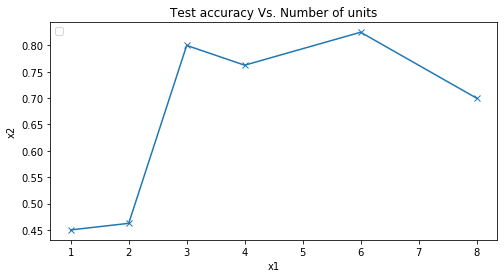

In [41]:
fig1 = plt.figure(figsize=(8,4))
plt.title("Test accuracy Vs. Number of units")
plt.xlabel("x1")
plt.ylabel("x2")
plt.plot(units, test_scores, marker='x')
plt.legend(loc="upper left")
plt.show() 

## Question 6

$\phi_1$ = 200/400 = 1/2
$\phi_2$ = 200/400 = 1/2

$\mathbf{\mu}_1$ = [4,4]

$\mathbf{\mu}_2$ = [6,6]

$\mathtt{\Sigma}_1$ = [1, 0/0, 1]

$\mathtt{\Sigma}_2$ = [1, 0/0, 1]

The 2d sigma implies that x1 and x2 have no relationship between each other.

## (b)

I think the k-means model would also be viable for this model because most of the data points have a minimum Euclidean distance to each of the cluster centroids so the k-means model can effectively associate each point with its class, except for a few outliers.

The GMM model would be more ideal as the data is generated from a Gaussian and therefore k-means is slightly worse in this case.